# Data Science Project: Identifying Genetic Markers for Sudden Heart Attacks

Project done by: Krishna Priya Nemalikanti

This project will guide through basic analysis to identify potential gentic markers associated with sudden heart attacks. Python and other common data science libraries are used to analyze genetic data. 

# Project Overview:
1. Load and explore genetic data
2. Perform basic quality control
3. Conduct statistical analysis to find significant markers
4. Visualize the results

# Full Project Summary:

This Project demonstrated a basic genetic association study workflow
1. I have simulated genetic data with some "risk" SNPs
2. Performed quality checks 
3. Used chi-square tests to find associated SNPs
4. Corrected for multiple testing
5. Visualized results with Manhattan and odds ratio plots
6. Interpreted the findings.

# Important points to note:
1. This is a simplied educational example 
2. Real genetic studies contains much larger and more complex datasets with thousands of individuals and millions of SNPs.
3. Use of sophiscated methods like logistic regression will prove to much efficient
4. Real studies will employ rigorous Quality control 

# Scope of improvement in this Project:
1. Adding covariates like age, sex, and other risk factors 
2. Using logistic regression instead of chi-sqaure tests
3. Implement multiple testing corrections
4. Add interaction effects between SNPs.
5. Using real datasets from public repositories. 

# Step 1: Setting up the Environment

- We import NumPy for numerical operations, pandas for data handling, matplotlib and seaborn for visualization
- np.random.seed(42) ensures reproducibility of any random operations
- We set the plotting style with plt.style.use("ggplot"). 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set random seed for reproducibility 
np.random.seed(42)

# Set plotting style 
plt.style.use("ggplot")

In [2]:
print("numpy version: ", np.__version__)
print("pandas version: ", pd.__version__)
print("seaborn version: ", sns.__version__)

numpy version:  1.26.4
pandas version:  2.0.3
seaborn version:  0.12.2


# Step 2: Load and Explore the data 

- For this project we are simulating genetic data.
- Here we created a dataset with 1000 individuals (500 cases with hear attachs, 500 controls without).
- We simulated 50 Single Nucleotide Polynorphisms(SNPs), common genetic markers. 
- Most SNPs (45) have random distribution with no real effect.
- 5 SNPs (SNP_45 to SNP_49) are simulated to have a different distribution between cases and controls.
- The head() function shows the first few rows of our dataset 

In [3]:
# Simulate genetic data for 1000 individuals (500 cases , 500 controls)

num_of_individuals = 1000
num_of_snps = 50 # we will examine 50 genetic markers (single nucleotide polymorphism (SNPs))

# Create a DataFrame for our genetic data 

data = pd.DataFrame({'individual_id': range(num_of_individuals),
                     'case_control': [1] * 500 + [0] * 500})  # 1= case (had heart attack), 0= control

In [4]:
# Simulate SNP data (0,1, or 2 representing allele counts)

for snp in range(num_of_snps):
    # Most SNPs have not effect(random frquencies)
    if snp < 45:
        data[f'SNP_{snp}'] = np.random.choice([0,1,2], size=num_of_individuals, p=[0.25,0.5,0.25])
        
    # Last SNPs have some association with heart attacks 
    else:
        # Cases have higher frequency of risk allel(2)
        case_allels = np.random.choice([0,1,2], size=500, p=[0.1,0.3,0.6])
        control_allels = np.random.choice([0,1,2], size=500, p=[0.3,0.5,0.2])
        data[f'SNP_{snp}'] = np.concatenate([case_allels, control_allels])
        

In [5]:
# Display the first few rows of the data 
print(data.head())

   individual_id  case_control  SNP_0  SNP_1  SNP_2  SNP_3  SNP_4  SNP_5  \
0              0             1      1      0      1      1      1      1   
1              1             1      2      1      0      2      2      1   
2              2             1      1      2      2      1      2      2   
3              3             1      1      1      0      1      0      1   
4              4             1      0      2      1      1      0      2   

   SNP_6  SNP_7  ...  SNP_40  SNP_41  SNP_42  SNP_43  SNP_44  SNP_45  SNP_46  \
0      1      0  ...       1       2       2       0       1       1       2   
1      0      0  ...       0       2       2       0       2       2       2   
2      2      2  ...       0       0       0       1       2       2       1   
3      1      2  ...       0       2       1       2       2       2       0   
4      0      1  ...       0       2       2       1       0       1       1   

   SNP_47  SNP_48  SNP_49  
0       2       2       2  
1     

# Step 3: Data Quality Check

- Before we proceed to analyze the data we need to check data's quality. 
- isnull().sum() checks for missing data in each column.
- We visualize distribution of the first 5 SNPs to ensure they look reasonable. 
- In real-world scenarios we would also check for Hardy- Weinberg equilibrium and other quality metrics 

In [6]:
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())


Missing values per column:
individual_id    0
case_control     0
SNP_0            0
SNP_1            0
SNP_2            0
SNP_3            0
SNP_4            0
SNP_5            0
SNP_6            0
SNP_7            0
SNP_8            0
SNP_9            0
SNP_10           0
SNP_11           0
SNP_12           0
SNP_13           0
SNP_14           0
SNP_15           0
SNP_16           0
SNP_17           0
SNP_18           0
SNP_19           0
SNP_20           0
SNP_21           0
SNP_22           0
SNP_23           0
SNP_24           0
SNP_25           0
SNP_26           0
SNP_27           0
SNP_28           0
SNP_29           0
SNP_30           0
SNP_31           0
SNP_32           0
SNP_33           0
SNP_34           0
SNP_35           0
SNP_36           0
SNP_37           0
SNP_38           0
SNP_39           0
SNP_40           0
SNP_41           0
SNP_42           0
SNP_43           0
SNP_44           0
SNP_45           0
SNP_46           0
SNP_47           0
SNP_48           0
SNP

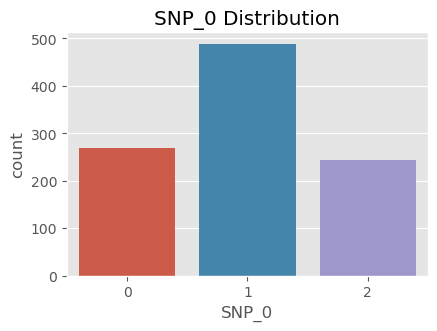

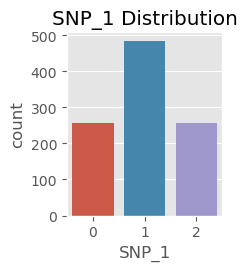

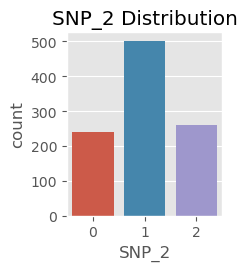

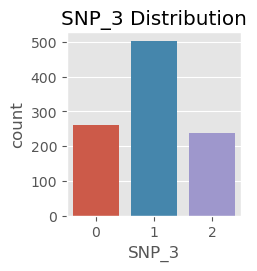

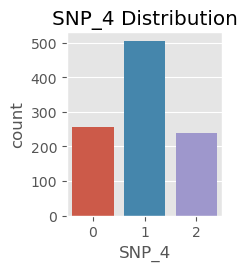

In [7]:
# Check allele frequency distribution 
plt.figure(figsize=(12,6))

# Plot fisrt 5 SNPs
for i in range(5):
    plt.subplot(2,3, i + 1)
    sns.countplot(x=f'SNP_{i}', data = data)
    plt.title(f'SNP_{i} Distribution')
    plt.tight_layout()
    plt.show()
    

# Step 4: Statistical Analysis

- To perform statistical analysis we'll use chi-square test to find SNPs associated with heart attacks
- For each SNP, we create a contingency table showing allele counts in cases vs controls.
- Thereby, performed a chi-square test to check for association between the SNPs and heart attack status. 
- Calaculated a simple odds_ratio to measure effect size (how much risk the SNP adds)
- Results are stored and sorted by p-value (lower p-value means stronger evidence of assoiation)

In [8]:
# Initialize an empty Dataframe to save the results 
results= pd.DataFrame(columns = ['SNP', 'chi2', 'p_value', 'odds_ratio'])

# Performe chi-square test for each SNP
for snp in [f'SNP_{i}' for i in range(num_of_snps)]:
    #Create a contingency table
    contingency = pd.crosstab(data[snp], data['case_control'])
    
    #Chi-square test
    chi2, p, _, _ = stats.chi2_contingency(contingency)
    
    #Calculate the odds ratio (simlified)
    odds_ratio = (contingency.loc[2,1] * contingency.loc[0,0]) / \
    (contingency.loc[0,1]* contingency.loc[2,0])
    
    #Create a temporary DataFrame for the current SNP
    temp_df = pd.DataFrame({
         'SNP' : [snp],
         'chi2': [chi2],
         'p_value' :[p],
         'odds_ratio': [odds_ratio]
    })
    
    #Concatenate with the main results Dataframe
    results = pd.concat([results, temp_df], ignore_index = True)
    

# Sort by p_value
results = results.sort_values('p_value')

# Display top 10 SNPs
print("\nTop 10 SNPs by association p-value")
print(results.head(10))


Top 10 SNPs by association p-value
       SNP        chi2       p_value  odds_ratio
49  SNP_49  236.974090  3.481209e-52   13.678341
45  SNP_45  207.581863  8.397911e-46   12.020106
46  SNP_46  179.939051  8.447564e-40    9.794118
48  SNP_48  141.829834  1.592366e-31    7.827381
47  SNP_47  135.574217  3.634401e-30    6.902256
29  SNP_29    8.872113  1.184255e-02    0.579196
40  SNP_40    8.098699  1.743371e-02    1.613005
14  SNP_14    6.949368  3.097161e-02    0.848498
11  SNP_11    5.251355  7.239071e-02    1.148113
42  SNP_42    4.823917  8.963958e-02    0.922438


# Step 5: Multiple Testing Correction

- Here we need to adjust the p-values to avoid false positives. 
- As we see in the 'results' dataframe, When testing many SNPs some will appear significant by chance(false positive).
- Bonferroni Correction multiplies each p-value by the number of tests (which is 50 in the project)
- We capped the corrected p-value to 1 as probabilities cannot exceed 1. 
- We filter the SNPs that remain significant after correction (p < 0.05)

In [9]:
# Apply Bonferroni Correction 
results['p_value_corrected']= results['p_value'] * num_of_snps
results['p_value_corrected']= results['p_value_corrected'].clip(upper =1) # to cap at 1

# Display significant SNPs after correction
significant_snps = results[results['p_value_corrected'] < 0.05]
print("\nSignificant SNPs after mutlitple testing correction:")
print(significant_snps)


Significant SNPs after mutlitple testing correction:
       SNP        chi2       p_value  odds_ratio  p_value_corrected
49  SNP_49  236.974090  3.481209e-52   13.678341       1.740605e-50
45  SNP_45  207.581863  8.397911e-46   12.020106       4.198956e-44
46  SNP_46  179.939051  8.447564e-40    9.794118       4.223782e-38
48  SNP_48  141.829834  1.592366e-31    7.827381       7.961830e-30
47  SNP_47  135.574217  3.634401e-30    6.902256       1.817201e-28


# Step 6: Visualization of Results

- Manhattan Plot: Shows -log10(p-value) for each SNP. Higher values mean more significant . Red points are significant after correction. 
- Threshold line: indicates the significance cutoff after multiple testing correction
- Odds ration plot: For significant SNPs, shows how much they increase heart attack (OR > 1 means risk increase) 

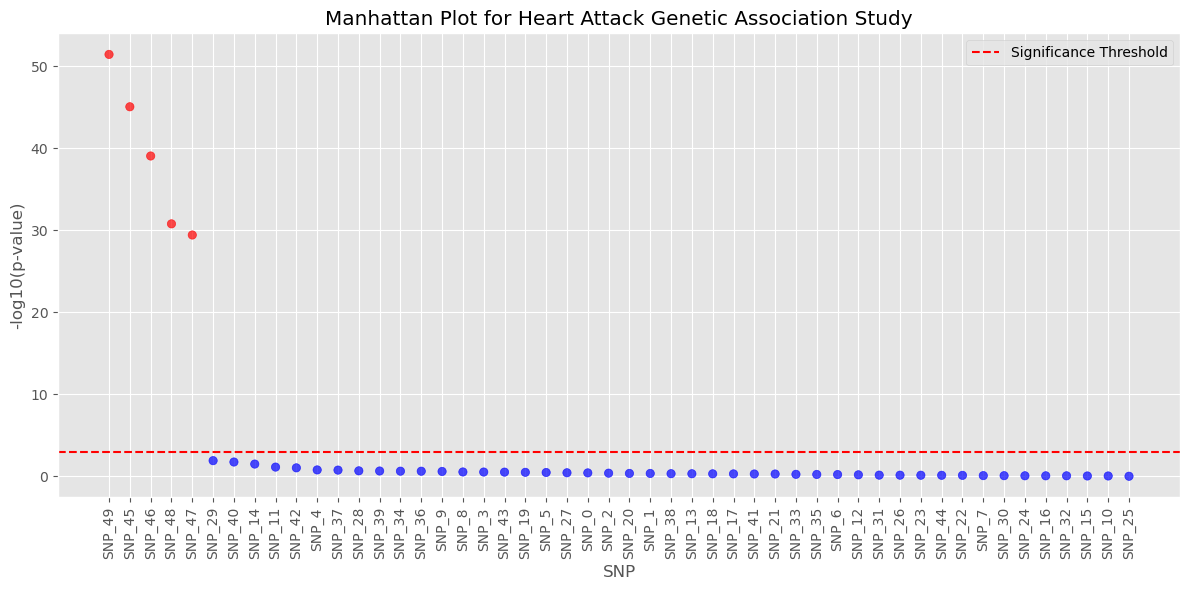

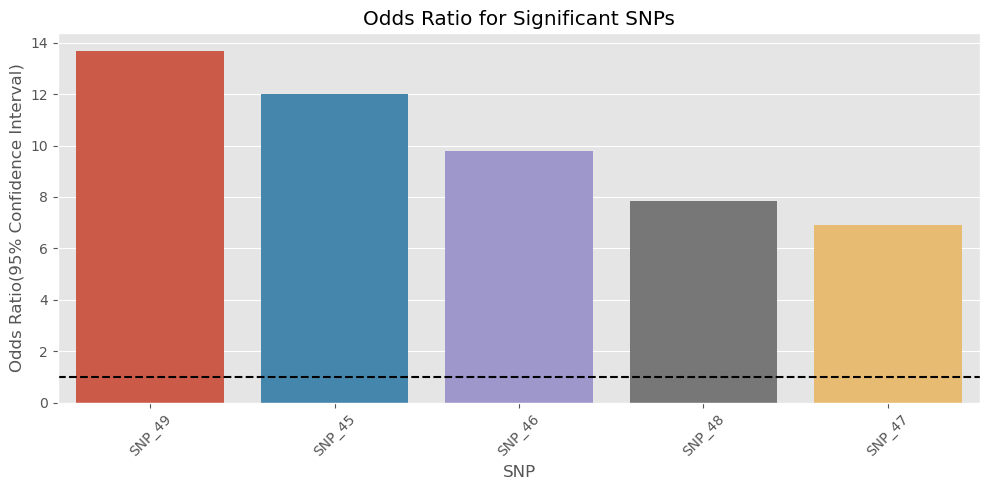

In [10]:
# Create a Manhattan plot (common in genetic studies)
plt.figure(figsize =(12,6))

# Plot all SNPs
plt.scatter(range(len(results)),
            -np.log10(results['p_value']),
           c=np.where(results['p_value_corrected'] < 0.05, 'red', 'blue'), alpha=0.7)

# Add significant threshold line (after correction)
threshold = -np.log10(0.05 / num_of_snps)
plt.axhline(y=threshold, color= 'r', linestyle='--', label='Significance Threshold')

# Customization of the plot 
plt.xticks(range(len(results)),
          results['SNP'], rotation=90)
plt.xlabel('SNP')
plt.ylabel('-log10(p-value)')
plt.title('Manhattan Plot for Heart Attack Genetic Association Study')
plt.legend()
plt.tight_layout()
plt.show()

# Plot odds ratios for significant SNPs
if not significant_snps.empty:
    plt.figure(figsize=(10,5))
    sns.barplot(x='SNP', y='odds_ratio', data= significant_snps)
    plt.axhline(y=1, color='black', linestyle='--')
    plt.title('Odds Ratio for Significant SNPs')
    plt.xticks(rotation=45)
    plt.ylabel('Odds Ratio(95% Confidence Interval)')
    plt.tight_layout()
    plt.show()

# Step 7: Interpretation

- This is the summarization of which SNPs are significantly associated with heart attacks
- For each significant SNP, we report it's odds ration which indicates how much it increases risk and corrected p-value.

In [11]:
# Print summary of the findings 
print("\nSummary of Findings:")

if not significant_snps.empty:
    print(f"Found {len(significant_snps)} significant genetic markers:")
    for _, row in significant_snps.iterrows():
        print(f"~{row['SNP']}: OR = {row['odds_ratio']:.2f}, p= {row['p_value_corrected']:.2e}")
        
else:
    print("No significant gentic markers found after multiple testing correction.")


Summary of Findings:
Found 5 significant genetic markers:
~SNP_49: OR = 13.68, p= 1.74e-50
~SNP_45: OR = 12.02, p= 4.20e-44
~SNP_46: OR = 9.79, p= 4.22e-38
~SNP_48: OR = 7.83, p= 7.96e-30
~SNP_47: OR = 6.90, p= 1.82e-28


----------------------------------------------------**END OF THE PROJECT**------------------------------------------------------------------